In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values
from pdpbox import pdp, info_plots #for partial plots
np.random.seed(123) #ensure reproducibility
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
%matplotlib inline 

pd.options.mode.chained_assignment = None  #hide any pandas warnings

C:\Users\emily\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
hf = pd.read_csv('C:/Users/emily/Desktop/heart_clean.csv')
hf.head(10)

,female,male,typical_angina,atypical_angina,non_anginal_pain,asymptomatic_pain,normal,ST-T wave abnormality,left ventricular hypertrophy,not_exercise_induced_angina,...,fixed defect,reversable defect,over_120_fasting_blood_sugar,under_120_fasting_blood_sugar,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,Target
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.708333,0.481132,0.244292,0.603053,0.370968,1
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.166667,0.339623,0.283105,0.885496,0.564516,1
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.250000,0.339623,0.178082,0.770992,0.225806,1
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.562500,0.245283,0.251142,0.816794,0.129032,1
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.583333,0.245283,0.520548,0.702290,0.096774,1
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.583333,0.433962,0.150685,0.587786,0.064516,1
6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.562500,0.433962,0.383562,0.625954,0.209677,1
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.312500,0.245283,0.312785,0.778626,0.000000,1
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.479167,0.735849,0.166667,0.694656,0.080645,1
9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.583333,0.528302,0.095890,0.786260,0.258065,1


Observe feature correlation on heart map.

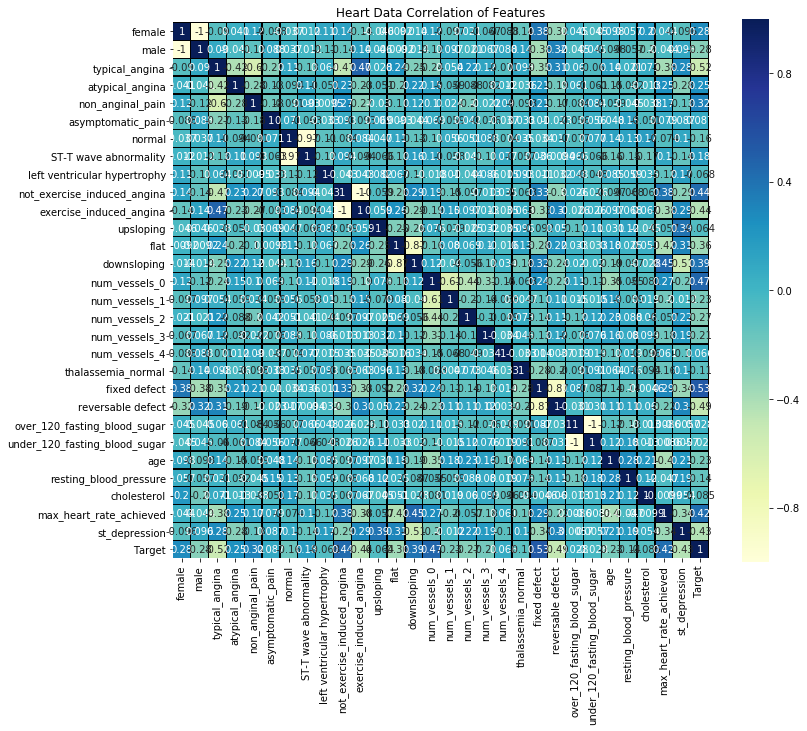

In [3]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Heart Data Correlation of Features')
# Draw the heatmap using seaborn
sns.heatmap(hf.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

Create a data frame using only the target column.

In [4]:
y = pd.DataFrame(hf.iloc[:,-1])
y.columns = ['Target']
y.head(10)

,Target
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


Create a data frame with the feature columns.

In [5]:
df = hf.iloc[:, :-1]
df.head(n=10)

,female,male,typical_angina,atypical_angina,non_anginal_pain,asymptomatic_pain,normal,ST-T wave abnormality,left ventricular hypertrophy,not_exercise_induced_angina,...,thalassemia_normal,fixed defect,reversable defect,over_120_fasting_blood_sugar,under_120_fasting_blood_sugar,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.708333,0.481132,0.244292,0.603053,0.370968
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.166667,0.339623,0.283105,0.885496,0.564516
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.250000,0.339623,0.178082,0.770992,0.225806
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.562500,0.245283,0.251142,0.816794,0.129032
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.583333,0.245283,0.520548,0.702290,0.096774
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.583333,0.433962,0.150685,0.587786,0.064516
6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.562500,0.433962,0.383562,0.625954,0.209677
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.312500,0.245283,0.312785,0.778626,0.000000
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.479167,0.735849,0.166667,0.694656,0.080645
9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.583333,0.528302,0.095890,0.786260,0.258065


Split data into test and train (validation). I will make my test size 20% since we don't have a lot of data.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = .17)

# Check multiple classifiers and see which ones perform best on the data.

## Fit a decision tree classifier for comparison.

In [16]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
dec_y_pred = dec_tree.predict(X_test)
dec_tree_score = accuracy_score(y_test, dec_y_pred)
dec_tree_score

0.75

Show confusion matrix on Decision Tree Classifier.

In [17]:
cm = []
cm = confusion_matrix(y_test,dec_y_pred)
print(cm)

[[15  6]
 [ 7 24]]


15 True positives, 6 false positives, 7 false negatives, 24 true negatives. Check the sensitivity and specificity.

In [18]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.6818181818181818
Specificity :  0.8


Check the average precision-recall score for Decision Tree Classifier.

In [19]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, dec_y_pred)

print('Average Decision Tree precision-recall score: {0:0.2f}'.format(
      average_precision))

Average Decision Tree precision-recall score: 0.75


## Fit a Random Forest model and compare to the decision tree classifier accuracy score.

In [20]:
rand_for = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
rand_for.fit(X_train, y_train)
rand_y_pred = rand_for.predict(X_test)
accuracy_score(y_test, rand_y_pred)

0.8461538461538461

Show confusion matrix on Random Forest Classifier.

In [21]:
cm = []
cm = confusion_matrix(y_test,rand_y_pred)
print(cm)

[[17  4]
 [ 4 27]]


17 True positives, 4 false positives, 4 false negatives, 27 true negatives. Check the sensitivity and specificity.

In [22]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8095238095238095
Specificity :  0.8709677419354839


Check the average precision-recall score for Random Forest Classifier.

In [23]:
average_precision = average_precision_score(y_test, rand_y_pred)

print('Average Random Forest precision-recall score: {0:0.2f}'.format(
      average_precision))

Average Random Forest precision-recall score: 0.84


Random forest classifier increases the accuracy score by over 16% when compared to the Decision tree classifier. It is more specific and sensitive. The precision-recall score is higher. I will use that classifier.

## Try gradient boosting. Check the accuracy score.

In [24]:
grad_boost = GradientBoostingClassifier(n_estimators=100)
grad_fit = grad_boost.fit(X_train, y_train)
grad_y_pred = grad_fit.predict(X_test)
grad_score = accuracy_score(y_test, grad_y_pred)
grad_score

0.8653846153846154

Show confusion matrix on Gradient Boost Classifier.

In [25]:
cm = []
cm = confusion_matrix(y_test,grad_y_pred)
print(cm)

[[17  4]
 [ 3 28]]


18 True positives, 5 false positives, 8 false negatives, 30 true negatives. Check the sensitivity and specificity.

In [26]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.85
Specificity :  0.875


In [27]:
average_precision = average_precision_score(y_test, grad_y_pred)

print('Average Gradient precision-recall score: {0:0.2f}'.format(
      average_precision))

Average Gradient precision-recall score: 0.85


## Try Ada boosting. Check the accuracy score.

In [28]:
ada = AdaBoostClassifier(n_estimators=100)
ada_fit = ada.fit(X_train, y_train)
ada_y_pred = ada_fit.predict(X_test)
ada_score = accuracy_score(y_test, ada_y_pred)
ada_score

0.8653846153846154

Show confusion matrix on AdaBoost Classifier.

In [29]:
cm = []
cm = confusion_matrix(y_test,ada_y_pred)
print(cm)

[[15  6]
 [ 1 30]]


17 True positives, 6 false positives, 7 false negatives, 31 true negatives. Check the sensitivity and specificity.

In [30]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9375
Specificity :  0.8333333333333334


Check the average precision-recall score for Ada Boost Classifier.

In [31]:
average_precision = average_precision_score(y_test, ada_y_pred)

print('Average Adaboost precision-recall score: {0:0.2f}'.format(
      average_precision))

Average Adaboost precision-recall score: 0.83


Ada boosting gives the same accuracy rating as gradient boosting, but more sensitive and less specific (which is best for our data set), and the average precision-recall score is only slightly lower, so we will use AdaBoost to train the model.

# Train the ML algorithm

I will form a loop and inside it split the data into test and train (validation), Fit a random forest classifier, Fit an adaptive boosst classifier, and Cross-validate by repeating 5 times to train the algorithm.

In [33]:
ac_temp = 0

for i in [1,2,3,4,5]:
    
                X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = .15)
                tree1 = RandomForestClassifier(max_depth = 100).fit(X_train, y_train)
                tree2 = AdaBoostClassifier(n_estimators=100, learning_rate=0.01).fit(X_train, y_train)
    
                y_pred1 = tree1.predict(X_test)
                y_pred2 = tree2.predict(X_test)
                ac_temp1 = ac_temp+accuracy_score(y_test, y_pred1)
                ac_temp2 = ac_temp+accuracy_score(y_test, y_pred2)

In [34]:
 print(ac_temp1)
 print(ac_temp2)

0.9347826086956522
0.9130434782608695


In order to minimize false negatives, if the two classifiers above do not produce the same result, we predict "1" or positive for heart disease. This for loop creates my Combined Classifier.

In [35]:
y1_array = y_pred1
y2_array = y_pred2

In [36]:
solution=[]

for i, j in zip(y1_array, y2_array):
        if i == 0 and j == 0:
            solution.append(0)
        else:
            solution.append(1)

accuracy_score(y_test, solution)

0.9347826086956522

Show confusion matrix on Combined Classifier: Random Forest and AdaBoost.

In [37]:
cm = []
cm = confusion_matrix(y_test,solution)
print(cm)

[[20  2]
 [ 1 23]]


20 True positives, 2 false positives, 1 false negatives, 23 true negatives. Check the sensitivity and specificity.

In [38]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9523809523809523
Specificity :  0.92


Check the average precision-recall score for Combined Classifier.

In [39]:
average_precision = average_precision_score(y_test, solution)

print('Average combined classifier precision-recall score: {0:0.2f}'.format(
      average_precision))

Average combined classifier precision-recall score: 0.90


Combining these two classifiers improves our precision-recall score more than any one classifier.

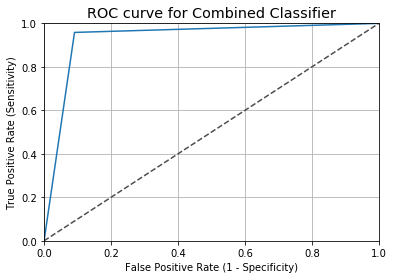

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, solution)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Combined Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [43]:
area_under_curve = auc(fpr, tpr)
print('Area Under Curve = ', area_under_curve)

Area Under Curve =  0.9337121212121212


The area under the curve falls in an excellent range. This Combined Classifier is a great way to train my model.